In [1]:
import numpy as np
import pandas as pd
import requests
import json
import os
import dotenv
import sys
sys.tracebacklimit = 0 # turn off the error tracebacks
from newspaper import Article
import re

In [2]:
dotenv.load_dotenv()
token = os.getenv('token')

In [4]:
myanmardict = {'q':'Rohingya&', 'from':'2017-08-24&', 'language':'en', 'pageSize':100, 'apiKey': token}

In [5]:
myanmar = requests.get('http://newsapi.org/v2/everything?', params=myanmardict)
myanmar

<Response [200]>

In [6]:
myanmarjson = json.loads(myanmar.text)

In [53]:
myanmardf = pd.json_normalize(myanmarjson, record_path = ['articles'])
myanmardf = myanmardf.loc[~myanmardf.title.duplicated(),]

In [54]:
myanmardf

,author,title,description,url,urlToImage,publishedAt,content,source.id,source.name
0,None,Global virtual aid conference to be held for R...,Global virtual aid conference to be held for R...,https://uk.reuters.com/article/uk-myanmar-rohi...,None,2020-10-15T07:39:00Z,FILE PHOTO: Rohingyas living in Malaysia prote...,reuters,Reuters
1,Reuters Staff,"Myanmar election app goes offline, has been cr...",A smartphone app produced for Myanmar’s Nov. 8...,https://in.reuters.com/article/myanmar-electio...,https://static.reuters.com/resources/r/?m=02&d...,2020-10-02T15:46:00Z,By Reuters Staff\r\nYANGON (Reuters) - A smart...,reuters,Reuters
2,Reuters Staff,Global virtual aid conference to be held for R...,A global virtual international donor conferenc...,https://www.reuters.com/article/myanmar-rohing...,https://static.reuters.com/resources/r/?m=02&d...,2020-10-15T07:43:00Z,By Reuters Staff\r\n(Reuters) - A global virtu...,reuters,Reuters
3,Reuters Staff,Global virtual aid conference to be held for R...,A global virtual international donor conferenc...,https://in.reuters.com/article/myanmar-rohingy...,https://static.reuters.com/resources/r/?m=02&d...,2020-10-15T08:05:00Z,By Reuters Staff\r\n(Reuters) - A global virtu...,reuters,Reuters
4,"Rozanna Latiff, A. Ananthalakshmi",Anti-migrant sentiment fanned on Facebook in M...,As coronavirus infections surged in Malaysia t...,https://www.reuters.com/article/us-facebook-ma...,https://static.reuters.com/resources/r/?m=02&d...,2020-10-14T03:20:00Z,KUALA LUMPUR (Reuters) - As coronavirus infect...,reuters,Reuters
...,...,...,...,...,...,...,...,...,...
94,"David Pierson, ANDREW NACHEMSON","As Myanmar prepares to vote, a COVID-19 outbre...","Five years after emerging from military rule, ...",https://news.yahoo.com/myanmar-prepares-vote-c...,https://s.yimg.com/uu/api/res/1.2/rwxNxYwdpGg2...,2020-10-23T08:30:11Z,People wearing facemasks walk to a bus stop in...,None,Yahoo Entertainment
95,AZM Anas,Education woes add to tensions outside Rohingy...,Local educators warn of a lost generation as r...,https://www.thenewhumanitarian.org/news-featur...,https://www.thenewhumanitarian.org/s3/files/st...,2020-10-13T11:50:37Z,The coronavirus pandemic has disrupted schooli...,None,The New Humanitarian
96,"Aisha Salaudeen, CNN",These Africans are among the world's 100 most ...,Nigerian entrepreneur and philanthropist Tony ...,https://www.cnn.com/2020/09/23/africa/2020-tim...,https://cdn.cnn.com/cnnnext/dam/assets/1908131...,2020-09-23T17:47:41Z,"Lagos, Nigeria (CNN)Nigerian entrepreneur and ...",cnn,CNN
97,FMT Reporters,Rohingya body seeks intervention from world le...,The association urges countries to cut economi...,https://www.freemalaysiatoday.com/category/nat...,https://s3media.freemalaysiatoday.com/wp-conte...,2020-09-27T10:55:04Z,Many of the Rohingya have fled Myanmar and Ban...,None,Free Malaysia Today


In [43]:
urls = []
for i in range(0, myanmardf.shape[0]):
    urls.append(myanmardf.iloc[i]['url'])

In [44]:
len(urls)

94

In [55]:
articles = {}
for j in urls:
    try:
        art = Article(j)
        art.download()
        art.parse()
        text = re.sub('\s+',' ',art.text)
        if text not in articles.values():
            articles[j] = text
    except:
        continue

In [89]:
myanmar_texts = pd.DataFrame.from_dict(articles, orient='index', columns=['text'])

In [94]:
myanmar_texts.iloc[5:10]

,text
https://uk.reuters.com/article/uk-myanmar-rohingya-idUKKBN2772GN,(Reuters) - International donors pledged nearl...
https://uk.reuters.com/article/us-health-coronavirus-snapshot-idUKKBN26Z0M0,(Reuters) - Here’s what you need to know about...
https://in.reuters.com/article/myanmar-election-idINKBN27207S,(Reuters) - More than half the polling station...
https://www.reuters.com/article/us-myanmar-election-idUSKBN27207J,(Reuters) - More than half the polling station...
https://www.vice.com/en/article/ep4jgz/rohingya-trapped-by-apartheid-regime-in-myanmar-says-human-rights-watch,Rohingya people who were arrested at sea in De...


In [96]:
myanmar_texts.iloc[10,0]

'“I heard that a man in a nearby camp area got infected with the virus and I am afraid that it might spread here soon,” Sukkur told VICE News from one of the congested settlements in Bangladesh’s Cox’s Bazar district. Rohingya refugee Abdul Sukkur tries to protect himself from coronavirus by regularly washing his hands and wearing a mask, but as a resident of the most densely populated refugee camp in the world, he can’t always keep a safe distance from neighbors. Over a million Rohingya Muslim refugees live in the sprawling, packed camps in southern Bangladesh, having fled from Myanmar in waves of violence going back decades. The most recent influx was in 2017, when the Myanmar military violently expelled more than 740,000 Rohingya in operations UN investigators said were carried out with genocidal intent. Myanmar says it was defending itself against militants and while it has admitted to some violations it denies the genocide claim.'

In [66]:
myanmar_texts['text']= myanmar_texts['text'].map(lambda x: re.sub('[,\.!?]', '', x))
myanmar_texts['text'] = myanmar_texts['text'].map(lambda x: x.lower())

In [67]:
myanmar_texts.head()

,text
https://uk.reuters.com/article/uk-myanmar-rohingya-conference-idUKKBN2700VF,(reuters) - a global virtual international don...
https://in.reuters.com/article/myanmar-election-idINKBN26N2PT,yangon (reuters) - a smartphone app produced f...
https://in.reuters.com/article/myanmar-rohingya-conference-idINKBN2700XM,(reuters) - a global virtual international don...
https://www.reuters.com/article/us-facebook-malaysia-rohingya-idUSKBN26Z0BJ,kuala lumpur (reuters) - as coronavirus infect...
https://uk.reuters.com/article/uk-facebook-malaysia-rohingya-idUKKBN26Z0BP,kuala lumpur (reuters) - as coronavirus infect...


In [69]:
from wordcloud import WordCloud

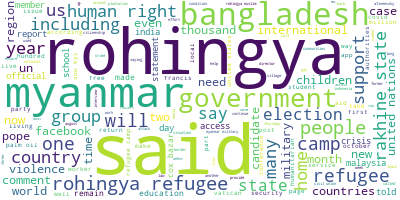

In [70]:
# Join the different processed titles together.
long_string = ','.join(list(myanmar_texts['text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [71]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

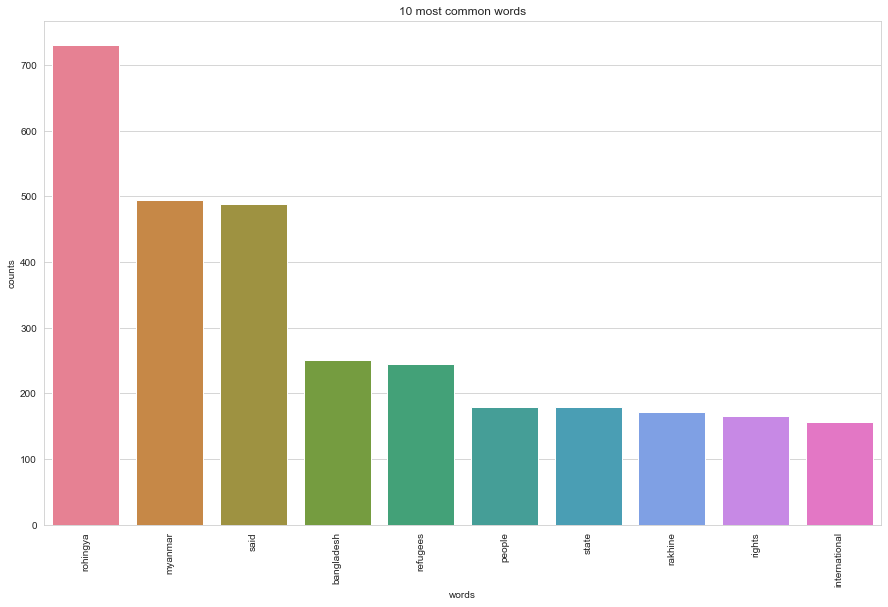

In [72]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(myanmar_texts['text'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [73]:
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA

In [100]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
military myanmar said rakhine government information states people state asean

Topic #1:
rohingya myanmar bangladesh refugees said camps refugee united humanitarian international

Topic #2:
myanmar app rohingya said facebook india election international ethnic uec

Topic #3:
election myanmar rohingya rakhine said state government military rights nld

Topic #4:
said reuters rohingya myanmar facebook malaysia rights anti speech pages

Topic #5:
pope francis said vatican afineevsky civil film unions gay people

Topic #6:
incident decades war risked going attempts hope mask wearing girls

Topic #7:
education children eu myanmar rohingya app formal rights curriculum said

Topic #8:
rohingya said myanmar case school international bangladesh refugee students refugees

Topic #9:
said oil palm workers ap malaysia labor jum plantations companies


In [85]:
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

In [103]:
#pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics)+'.html')
LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')


SyntaxError: positional argument follows keyword argument (<ipython-input-103-b2778f56bdea>, line 4)